<a href="https://colab.research.google.com/github/ivelin/canswim/blob/main/canswim_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experimental attempt to implement growth stock indicators in support of CANSLIM style investors and traders.

## Prepare Environment

Jupyter notebook housekeeping

In [ ]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline


### Install local canswim package

In [ ]:
# pip install -r requirements.txt
# !pip install -e ./

import sys
!{sys.executable} -m pip install -e ./


## Prepare Model

### Load Data

In [ ]:
from canswim.model import CanswimModel

canswim_model = CanswimModel()


In [ ]:

# canswim_model.covariates.load_institutional_symbol_ownership()

In [ ]:
# canswim_model.covariates.inst_symbol_ownership_df

In [ ]:
# canswim_model.covariates.inst_symbol_ownership_df.dtypes

In [ ]:
# list(canswim_model.covariates.inst_symbol_ownership_df.index.get_level_values(0).unique())

In [ ]:
# canswim_model.load_data()

In [ ]:
# canswim_model.prepare_data()

In [ ]:
# iseries = canswim_model.covariates.prepare_institutional_symbol_ownership_series(stock_price_series=canswim_model.stock_price_series)

In [ ]:
# key, value = list(iseries.items())[1]

In [ ]:
# key

In [ ]:
# value.pd_dataframe()

In [ ]:
# value

In [ ]:
# value.static_covariates_values()

In [ ]:
# value.pd_dataframe().index.has_duplicates

In [ ]:
# assert False

In [ ]:

canswim_model.load_data()  


In [ ]:
# canswim_model.covariates.load_past_covariates()
# canswim_model.covariates.load_future_covariates()

### Prepare Data

In [ ]:

def prepare_data():
    canswim_model.prepare_data()
    canswim_model.plot_splits()
    canswim_model.plot_seasonality()



In [ ]:
prepare_data()

In [ ]:
canswim_model.stock_tickers

In [ ]:
t = list(canswim_model.targets.target_series.keys())[0]
t

In [ ]:
canswim_model.target_train_list[0].pd_dataframe()

In [ ]:
future_covs = canswim_model.future_cov_list[0].pd_dataframe().tail(500)
past_covs = canswim_model.past_cov_list[0].pd_dataframe().tail(500)

In [ ]:
future_covs

In [ ]:
past_covs

In [ ]:
len(canswim_model.targets_list)

In [ ]:
len(canswim_model.target_train_list)

In [ ]:
len(canswim_model.past_cov_list)

In [ ]:
len(canswim_model.future_cov_list)

## Find optimal hyper parameters

In [ ]:
# canswim_model.find_model()


In [ ]:
# len(canswim_model.targets_list)

In [ ]:
# len(canswim_model.target_train_list)

In [ ]:
# len(canswim_model.past_cov_list)

In [ ]:
# len(canswim_model.future_cov_list)

In [ ]:
# from darts.models import TiDEModel

# model = TiDEModel.load_from_checkpoint(canswim_model.model_name)


In [ ]:
# canswim_model.load_model()


In [ ]:
# preds = model.predict(
#     n=model.output_chunk_length,
#     series=canswim_model.target_train_list,
#     mc_dropout=True,
#     num_samples=500,
#     past_covariates=canswim_model.past_cov_list,
#     future_covariates=canswim_model.future_cov_list,
#     num_loader_workers=4,
# )

In [ ]:
# preds[0]

In [ ]:
# len(preds)

In [ ]:
# from darts.metrics import quantile_loss

# loss = quantile_loss(canswim_model.targets_list, preds, n_jobs=-1, verbose=True)


In [ ]:
# import numpy as np
# loss_val = np.mean(loss)
# loss_val  

In [ ]:
# canswim_model.test()
# canswim_model.plot_test_results()    


In [ ]:
# len(canswim_model.targets_list)

In [ ]:
# thorough backtest of model checkpoint
# start_list = canswim_model.get_val_start_list()
# backtest, test_error = canswim_model.backtest(series=canswim_model.targets_list[0], start=start_list[0],
#                                              past_covariates=canswim_model.past_cov_list[0], future_covariates=canswim_model.future_cov_list[0],
#                                              forecast_horizon=canswim_model.pred_horizon)        
# print(f"Backtest Quantile Loss = {test_error}")


In [ ]:
# canswim_model.plot_backtest_results(target=canswim_model.targets_list[0], backtest=backtest, start=start_list[0], forecast_horizon=canswim_model.pred_horizon)    

In [ ]:
# assert False

In [ ]:
# if a model has not been selected and saved yet
# run a hyper parameter search
# otherwise load saved model and continue training
##if not canswim_model.load_model():
##    # find and save the optimal model configuration
##    study = canswim_model.find_model()
##    print(f'Model search study results: \n{study}')

## Build Model
  * Using optimal hyper parameters from study above

In [ ]:
canswim_model.build(            
            input_chunk_length=252,
            output_chunk_length=42,
            hidden_size=1536,
            num_encoder_layers=3,
            num_decoder_layers=3,
            decoder_output_dim=8,
            temporal_decoder_hidden=64,
            use_layer_norm=True,
            use_reversible_instance_norm=True,
            dropout=0.2,
            optimizer_kwargs={"lr": 3.5e-05},
            force_reset=False,
            save_checkpoints=False)


## Train model

### Run model training loop

In [ ]:
from darts.metrics import quantile_loss
import numpy as np


def plot_backtest_results():
    # backtest on 3 stocks
    for i in range(min(len(canswim_model.targets_list),3)):
        start_list = canswim_model.get_val_start_list()
        backtest = canswim_model.backtest(target=canswim_model.targets_list[i], start=start_list[i],
                                                    past_covariates=canswim_model.past_cov_list[i], future_covariates=canswim_model.future_cov_list[i],
                                                    forecast_horizon=canswim_model.pred_horizon)        
        # print(f"target series: \n{target}")
        # print(f"backtest series: \n{backtest}")
        loss_vals = []
        for p, b in enumerate(backtest):
            loss = quantile_loss(canswim_model.targets_list[i], b, n_jobs=-1, verbose=True)
            print(f"quantile loss: {loss} at prediction step {p}")
            loss_vals.append(loss)
        mean_loss = np.mean(loss_vals)
        print(f"Mean Backtest Quantile Loss across all prediction periods: {mean_loss}")
        canswim_model.plot_backtest_results(target=canswim_model.targets_list[i], 
                                            backtest=backtest, 
                                            start=start_list[i],
                                            forecast_horizon=canswim_model.pred_horizon)        


 

In [ ]:

# train loop
for i in range(10):
    # prepare next sample subset
    prepare_data()
    # align all data series for training
    canswim_model.train()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

7842 target series, 30 backtest series


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.2619202914742205 at prediction step 0


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.7413897576655877 at prediction step 1


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.304209407231104 at prediction step 2


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.5006395747259325 at prediction step 3


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 3.5412023620757362 at prediction step 4


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.7326322383028068 at prediction step 5


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 2.3576440244483265 at prediction step 6


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.4695395362634267 at prediction step 7


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.9838381617773977 at prediction step 8


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.1475317518489119 at prediction step 9


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 7.248964078691069 at prediction step 10


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 5.942692444949933 at prediction step 11


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 3.3988471005033007 at prediction step 12


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 3.4588061941773907 at prediction step 13


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 3.229250781315634 at prediction step 14


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 3.7173860553541287 at prediction step 15


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 2.971195676850867 at prediction step 16


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 2.263760232087472 at prediction step 17


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 2.1456619140297635 at prediction step 18


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 2.3850199929706783 at prediction step 19


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.8722090853018312 at prediction step 20


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 2.056018748932708 at prediction step 21


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.5077514970564194 at prediction step 22


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.226546103992571 at prediction step 23


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.1789823074988144 at prediction step 24


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 0.9497010763808952 at prediction step 25


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.2984067957551886 at prediction step 26


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.4775763366096646 at prediction step 27


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 0.9129030069101989 at prediction step 28


  0%|          | 0/1 [00:00<?, ?it/s]

quantile loss: 1.2479758618885644 at prediction step 29
Mean Backtest Quantile Loss across all prediction periods: 2.284340079902351


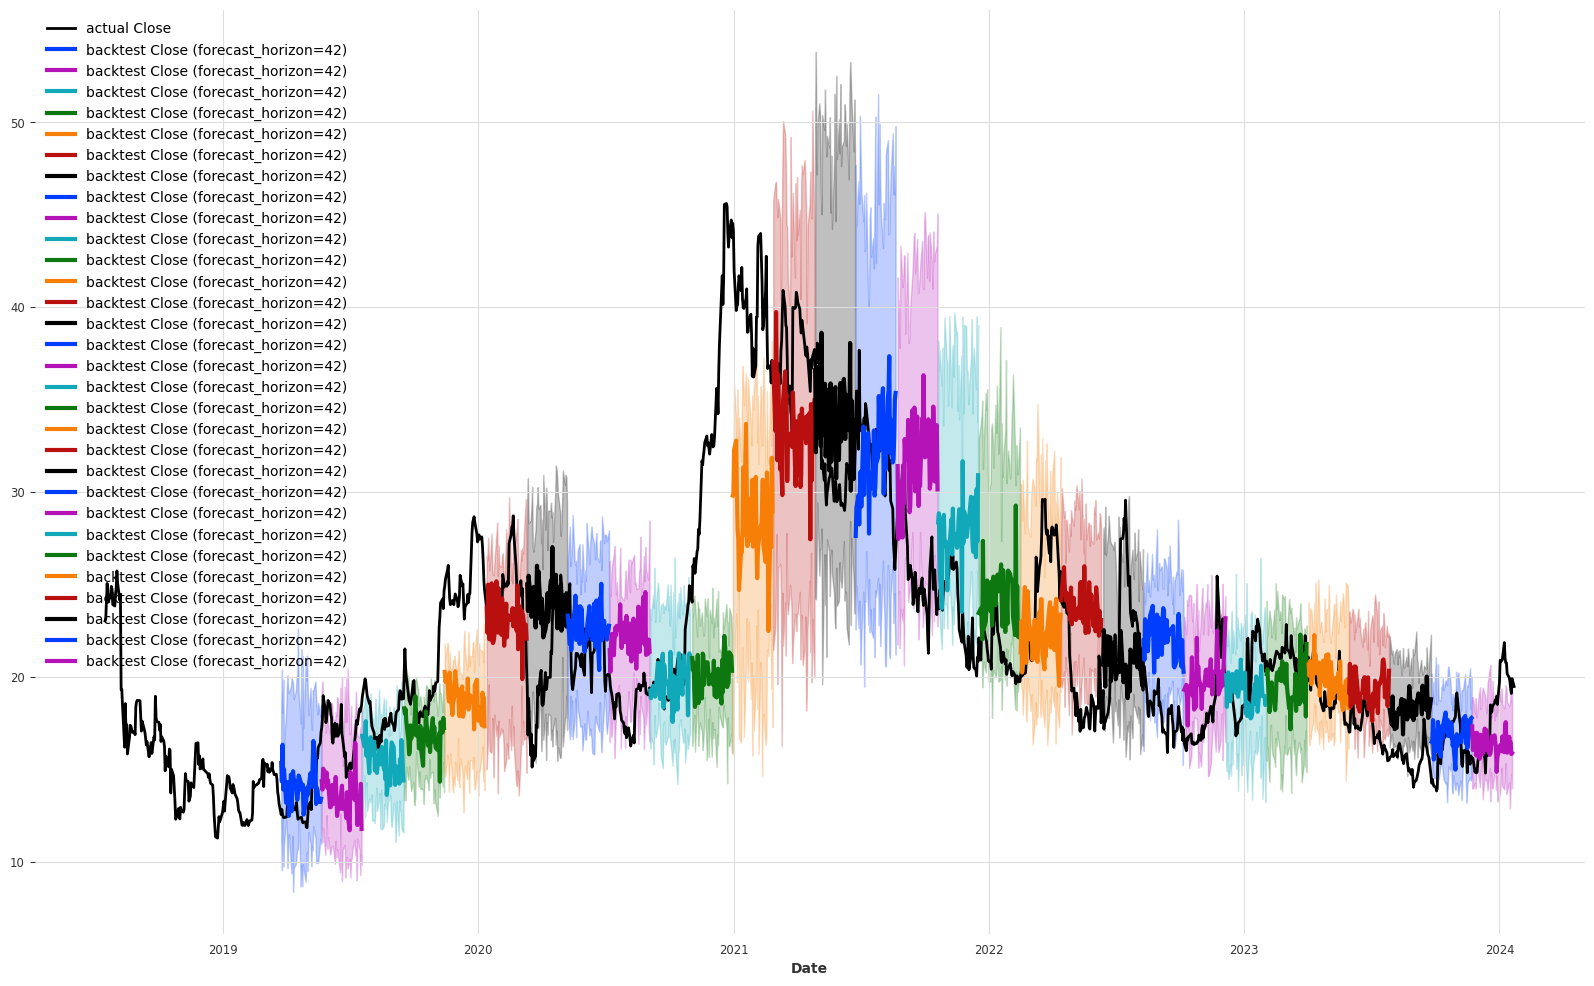

In [58]:
# backtest and plot results
plot_backtest_results()


In [ ]:

# quick test progress at modelcheckpoint
# preds = canswim_model.test()
# canswim_model.plot_test_results(preds)
